In [1]:
from os import listdir
from os.path import isfile, join
import re
import csv
import gensim
import numpy as np
from gensim.models.word2vec import Word2Vec
from gensim.models import KeyedVectors
from gensim.models.wrappers import FastText
import logging
import os
import pandas as pd 
import sys
import sklearn.metrics
import sklearn
import matplotlib.pyplot as plt #For graphics
import seaborn #Makes the graphics look nicer
import random
import math
import warnings
import utils
from utils import *
import scipy.stats
from dataDictionariesLexicons import *

random.seed(1)

warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=DeprecationWarning)
# warnings.filterwarnings('ignore')

sys.path.insert(0, '../') # necessary in order to import word2vecTraining where the epoch saver class, which is part of the model, is located

In [2]:
modelsPath = os.path.normpath(r'D:\data\wordVectors') 
# modelFilePath = os.path.join(modelsPath, 'GoogleNews-vectors-negative300.bin')
# model2 = KeyedVectors.load_word2vec_format(modelFilePath,binary=True) 
modelFilePath = os.path.join(modelsPath, 'GoogleNews-vectors-negative300LowerCase.bin')
model1 = KeyedVectors.load(modelFilePath) 

In [3]:
modelsPath = os.path.normpath(r'D:\data\wordVectors') 
modelFilePath = os.path.join(modelsPath, 'glove.6B.300d.txt.word2vec.bin')
model2 = KeyedVectors.load_word2vec_format(modelFilePath,binary=True) 

In [4]:
modelsPath = os.path.normpath(r'D:\data\wordVectors') 
modelFilePath = os.path.join(modelsPath, 'glove.twitter.27B.200d.txt.word2vec.bin')
model3 = KeyedVectors.load(modelFilePath) 

In [5]:
modelsPath = os.path.normpath(r'D:\data\wordVectors') 
modelFilePath = os.path.join(modelsPath, 'glove.42B.300d.txt.word2vec.bin')
model4 = KeyedVectors.load(modelFilePath) 

In [6]:
modelsPath = os.path.normpath(r'D:\data\wordVectors') 
modelFilePath = os.path.join(modelsPath, 'glove.840B.300d.txt.word2vec.bin')
model5 = KeyedVectors.load(modelFilePath) 

In [7]:
modelsPath = os.path.normpath(r'D:\data\wordVectors') 
modelFilePath = os.path.join(modelsPath, 'fastext-common-crawl-300d-2M-subword.bin')
model6 = KeyedVectors.load(modelFilePath)

In [8]:
modelsPath = os.path.normpath(r'D:\data\wordVectors') 
modelFilePath = os.path.join(modelsPath, 'fastext-wiki-news-300d-1M-subword-Original.bin')
model7 = KeyedVectors.load(modelFilePath)

In [9]:
models = [model1,model2,model3,model4,model5,model6,model7]

## Multiple plots - One Per lexicon

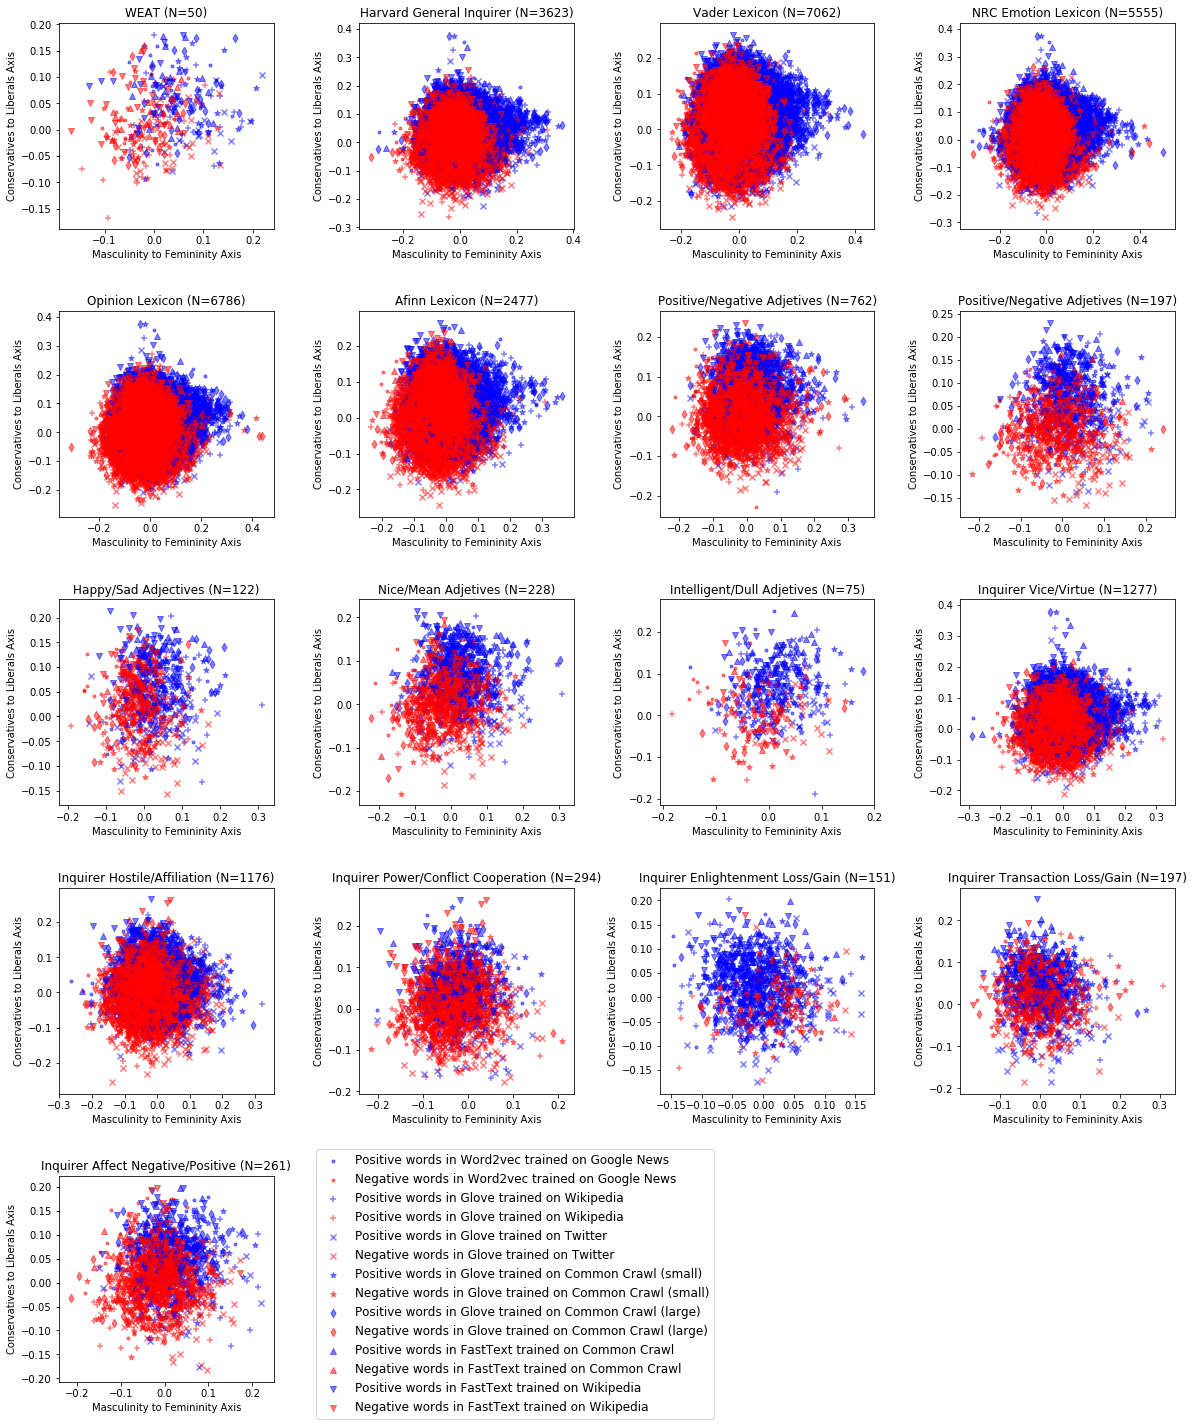

In [10]:
from pylab import *
import matplotlib.pyplot as plt

lexiconsList = [WEAT1,harvardGeneralInquirer3623,vaderLexicon7062,NRCEmotionLexicon5555,opinionLexicon6786,
    afinnLexicon2477,positiveNegativeAdjetives762,positiveNegativeAdjetives197,happySadAdjectives122,
    niceMeanAdjetives228,intelligentDullAdjetives75,inquirerViceVirtue1277,inquirerHostileAffiliation1176,
    inquirerPowerConflictCooperation294,inquirerEnlightenmentLossGain151,
    inquirerTransactionLossGain197,inquirerAffectNegativePositive261,
]

lexiconsNamesList = ['WEAT (N=50)','Harvard General Inquirer (N=3623)','Vader Lexicon (N=7062)','NRC Emotion Lexicon (N=5555)',
                     'Opinion Lexicon (N=6786)','Afinn Lexicon (N=2477)',
                     'Positive/Negative Adjetives (N=762)','Positive/Negative Adjetives (N=197)','Happy/Sad Adjectives (N=122)',
                     'Nice/Mean Adjetives (N=228)','Intelligent/Dull Adjetives (N=75)',
                     'Inquirer Vice/Virtue (N=1277)','Inquirer Hostile/Affiliation (N=1176)',
                     'Inquirer Power/Conflict Cooperation (N=294)','Inquirer Enlightenment Loss/Gain (N=151)',
                     'Inquirer Transaction Loss/Gain (N=197)','Inquirer Affect Negative/Positive (N=261)']

plt.rcParams['figure.figsize'] = [20, 25]


dataSetIndexes = ['1-4','8-1']

for lexiconIndex,RealDataTemp in enumerate(lexiconsList):
    subplot(5,4,lexiconIndex+1)

    dataFrameAggregate = pd.DataFrame(index=RealDataTemp.keys(), columns=['df1','df2','df3','df4','df5','df6','df7','df8',
                                                                      'df9','df10','df11','df12','df13','df14'])

    i=1
    for modelIndex, model in enumerate(models):
        
        for dataSetIndex in dataSetIndexes:
    #         print(dataDict[dataSetIndex]['name'])
            constructPole1 = dataDict[dataSetIndex]['constructPole1']
            constructPole2 = dataDict[dataSetIndex]['constructPole2']
            
            if modelIndex>=1: #Glove and fastext vocabulary uses - instead of _ So we need to alter Construct poles and real data - Checked!
                constructPole1,constructPole2,RealDataTemp=replaceUnderscoreForDash(constructPole1,constructPole2,RealDataTemp)
            if modelIndex in [1,2,3]: # Lowercase poles for models With only lowercase vocabularies - Checked!
                constructPole1 = list(set(list(map(str.lower,constructPole1))))
                constructPole2 = list(set(list(map(str.lower,constructPole2))))
            
            constructPole1,constructPole2 = constructsFilter(model,constructPole1,constructPole2,0)# Filter out terms not in model vocabulary

            RealData = realDataFilter(model,RealDataTemp,0)#Filter out terms not in model vocabulary (Last parameter Flag prints out OOV words)

            Axis = dimensionN(model, constructPole1,constructPole2)  
            AxisName='Axis'
            dataFrame = makeDF(model, RealData.keys(),Axis,AxisName)
            dataFrame['RealValues']=RealData.values()
    #         calculateCorrelations(dataFrame)
    #         print("XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX")

            dataFrameAggregate['df'+str(i)] = dataFrame['Axis'] 
            i+=1


    dataFrameAggregate['RealValues'] = dataFrame['RealValues'] #Word Labels 1 or -1

    dataFrameAggregatePositive = dataFrameAggregate[dataFrameAggregate['RealValues'] > 0]
    dataFrameAggregateNegative = dataFrameAggregate[dataFrameAggregate['RealValues'] < 0]

    # Plot
    plt.scatter(dataFrameAggregatePositive['df1'], dataFrameAggregatePositive['df2'], alpha=0.5,marker='.',color='b',label='Positive words in Word2vec trained on Google News')
    plt.scatter(dataFrameAggregateNegative['df1'], dataFrameAggregateNegative['df2'], alpha=0.5,marker='.',color='r',label='Negative words in Word2vec trained on Google News')

    plt.scatter(dataFrameAggregatePositive['df3'], dataFrameAggregatePositive['df4'], alpha=0.5,marker='+',color='b',label='Positive words in Glove trained on Wikipedia')
    plt.scatter(dataFrameAggregateNegative['df3'], dataFrameAggregateNegative['df4'], alpha=0.5,marker='+',color='r',label='Positive words in Glove trained on Wikipedia')

    plt.scatter(dataFrameAggregatePositive['df5'], dataFrameAggregatePositive['df6'], alpha=0.5,marker='x',color='b',label='Positive words in Glove trained on Twitter')
    plt.scatter(dataFrameAggregateNegative['df5'], dataFrameAggregateNegative['df6'], alpha=0.5,marker='x',color='r',label='Negative words in Glove trained on Twitter')

    plt.scatter(dataFrameAggregatePositive['df7'], dataFrameAggregatePositive['df8'], alpha=0.5,marker='*',color='b',label='Positive words in Glove trained on Common Crawl (small)')
    plt.scatter(dataFrameAggregateNegative['df7'], dataFrameAggregateNegative['df8'], alpha=0.5,marker='*',color='r',label='Negative words in Glove trained on Common Crawl (small)')

    plt.scatter(dataFrameAggregatePositive['df9'], dataFrameAggregatePositive['df10'], alpha=0.5,marker='d',color='b',label='Positive words in Glove trained on Common Crawl (large)')
    plt.scatter(dataFrameAggregateNegative['df9'], dataFrameAggregateNegative['df10'], alpha=0.5,marker='d',color='r',label='Negative words in Glove trained on Common Crawl (large)')

    plt.scatter(dataFrameAggregatePositive['df11'], dataFrameAggregatePositive['df12'], alpha=0.5,marker='^',color='b',label='Positive words in FastText trained on Common Crawl')
    plt.scatter(dataFrameAggregateNegative['df11'], dataFrameAggregateNegative['df12'], alpha=0.5,marker='^',color='r',label='Negative words in FastText trained on Common Crawl')

    plt.scatter(dataFrameAggregatePositive['df13'], dataFrameAggregatePositive['df14'], alpha=0.5,marker='v',color='b',label='Positive words in FastText trained on Wikipedia')
    plt.scatter(dataFrameAggregateNegative['df13'], dataFrameAggregateNegative['df14'], alpha=0.5,marker='v',color='r',label='Negative words in FastText trained on Wikipedia')

    # plt.scatter([0.15], [0.25], alpha=0.9)
    plt.title(lexiconsNamesList[lexiconIndex],size=12)
    labels=list(dataFrameAggregate.index)
    # for i, txt in enumerate(labels):
    #     try:
    #         plt.annotate(txt, (dataFrameAggregate['df1'][i],dataFrameAggregate['df2'][i]))
    #         plt.annotate(txt, (dataFrameAggregate['df3'][i],dataFrameAggregate['df4'][i]))
    #         plt.annotate(txt, (dataFrameAggregate['df5'][i],dataFrameAggregate['df6'][i]))
    #         plt.annotate(txt, (dataFrameAggregate['df7'][i],dataFrameAggregate['df8'][i]))
    #         plt.annotate(txt, (dataFrameAggregate['df9'][i],dataFrameAggregate['df10'][i]))
    #         plt.annotate(txt, (dataFrameAggregate['df11'][i],dataFrameAggregate['df12'][i]))
    #         plt.annotate(txt, (dataFrameAggregate['df13'][i],dataFrameAggregate['df14'][i]))
    #     except:
    #         pass

    plt.xlabel("Masculinity to Femininity Axis",size=10)
    plt.ylabel("Conservatives to Liberals Axis",size=10)
#     plt.legend()

#     plt.savefig('t1.png')
# subplot(9,2,lexiconIndex+2)
# plt.axis('off')
plt.legend(bbox_to_anchor=(1.2, 1.13), loc=2, borderaxespad=0,prop={'size': 12})
plt.subplots_adjust(hspace = 0.4,wspace = 0.4)
plt.show()

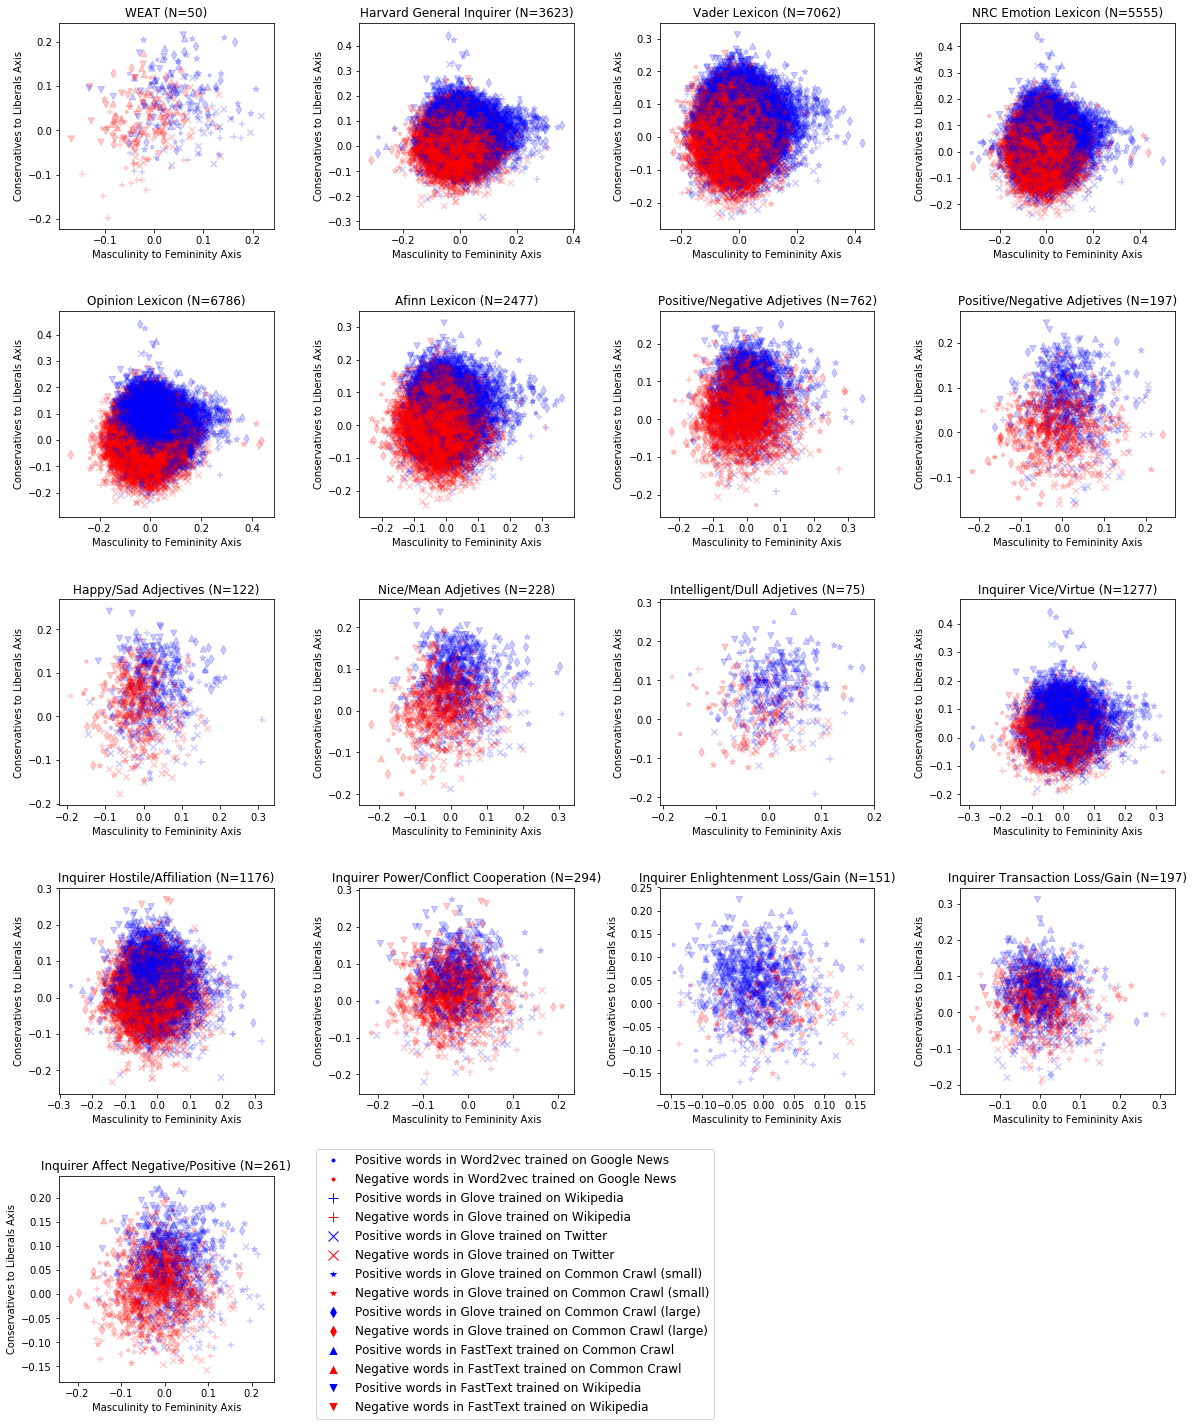

In [11]:
from pylab import *
import matplotlib.pyplot as plt

lexiconsList = [WEAT1,harvardGeneralInquirer3623,vaderLexicon7062,NRCEmotionLexicon5555,opinionLexicon6786,
    afinnLexicon2477,positiveNegativeAdjetives762,positiveNegativeAdjetives197,happySadAdjectives122,
    niceMeanAdjetives228,intelligentDullAdjetives75,inquirerViceVirtue1277,inquirerHostileAffiliation1176,
    inquirerPowerConflictCooperation294,inquirerEnlightenmentLossGain151,
    inquirerTransactionLossGain197,inquirerAffectNegativePositive261,
]

lexiconsNamesList = ['WEAT (N=50)','Harvard General Inquirer (N=3623)','Vader Lexicon (N=7062)','NRC Emotion Lexicon (N=5555)',
                     'Opinion Lexicon (N=6786)','Afinn Lexicon (N=2477)',
                     'Positive/Negative Adjetives (N=762)','Positive/Negative Adjetives (N=197)','Happy/Sad Adjectives (N=122)',
                     'Nice/Mean Adjetives (N=228)','Intelligent/Dull Adjetives (N=75)',
                     'Inquirer Vice/Virtue (N=1277)','Inquirer Hostile/Affiliation (N=1176)',
                     'Inquirer Power/Conflict Cooperation (N=294)','Inquirer Enlightenment Loss/Gain (N=151)',
                     'Inquirer Transaction Loss/Gain (N=197)','Inquirer Affect Negative/Positive (N=261)']

plt.rcParams['figure.figsize'] = [20, 25]


dataSetIndexes = ['1-4','8-1']
alphaValue =0.2
for lexiconIndex,RealDataTemp in enumerate(lexiconsList):
    subplot(5,4,lexiconIndex+1)

    dataFrameAggregate = pd.DataFrame(index=RealDataTemp.keys(), columns=['df1','df2','df3','df4','df5','df6','df7','df8',
                                                                      'df9','df10','df11','df12','df13','df14'])

    i=1
    for model in models:
        
        for dataSetIndex in dataSetIndexes:
    #         print(dataDict[dataSetIndex]['name'])
            constructPole1 = dataDict[dataSetIndex]['constructPole1']
            constructPole2 = dataDict[dataSetIndex]['constructPole2']
            constructPole1,constructPole2 = constructsFilter(model,constructPole1,constructPole2,0)# Filter out terms not in model vocabulary

            RealData = realDataFilter(model,RealDataTemp,0)#Filter out terms not in model vocabulary (Last parameter Flag prints out OOV words)

            Axis = dimensionN(model, constructPole1,constructPole2)  
            AxisName='Axis'
            dataFrame = makeDF(model, RealData.keys(),Axis,AxisName)
            dataFrame['RealValues']=RealData.values()
    #         calculateCorrelations(dataFrame)
    #         print("XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX")

            dataFrameAggregate['df'+str(i)] = dataFrame['Axis'] 
            i+=1


    dataFrameAggregate['RealValues'] = dataFrame['RealValues'] #Word Labels 1 or -1

    colors = list(map(lambda x: 'b' if x == True else 'r', dataFrameAggregate['RealValues']>0))

    plt.scatter(dataFrameAggregate['df1'], dataFrameAggregate['df2'],s=40, alpha=alphaValue,marker='.',c=colors,)

    plt.scatter(dataFrameAggregate['df3'], dataFrameAggregate['df4'],s=40, alpha=alphaValue,marker='+',c=colors,)

    plt.scatter(dataFrameAggregate['df5'], dataFrameAggregate['df6'],s=40, alpha=alphaValue,marker='x',c=colors,)

    plt.scatter(dataFrameAggregate['df7'], dataFrameAggregate['df8'],s=40, alpha=alphaValue,marker='*',c=colors,)

    plt.scatter(dataFrameAggregate['df9'], dataFrameAggregate['df10'],s=40, alpha=alphaValue,marker='d',c=colors,)
    plt.scatter(dataFrameAggregate['df11'], dataFrameAggregate['df12'],s=40, alpha=alphaValue,marker='^',c=colors,)
    plt.scatter(dataFrameAggregate['df13'], dataFrameAggregate['df14'],s=40, alpha=alphaValue,marker='v',c=colors,)

    # plt.scatter([0.15], [0.25], alpha=0.9)
    plt.title(lexiconsNamesList[lexiconIndex],size=12)
    labels=list(dataFrameAggregate.index)
    # for i, txt in enumerate(labels):
    #     try:
    #         plt.annotate(txt, (dataFrameAggregate['df1'][i],dataFrameAggregate['df2'][i]))
    #         plt.annotate(txt, (dataFrameAggregate['df3'][i],dataFrameAggregate['df4'][i]))
    #         plt.annotate(txt, (dataFrameAggregate['df5'][i],dataFrameAggregate['df6'][i]))
    #         plt.annotate(txt, (dataFrameAggregate['df7'][i],dataFrameAggregate['df8'][i]))
    #         plt.annotate(txt, (dataFrameAggregate['df9'][i],dataFrameAggregate['df10'][i]))
    #         plt.annotate(txt, (dataFrameAggregate['df11'][i],dataFrameAggregate['df12'][i]))
    #         plt.annotate(txt, (dataFrameAggregate['df13'][i],dataFrameAggregate['df14'][i]))
    #     except:
    #         pass

    plt.xlabel("Masculinity to Femininity Axis",size=10)
    plt.ylabel("Conservatives to Liberals Axis",size=10)
#     plt.legend()

#     plt.savefig('t1.png')
# subplot(9,2,lexiconIndex+2)
# plt.axis('off')
plt.legend(bbox_to_anchor=(1.2, 1.13), loc=2, borderaxespad=0,prop={'size': 12})

alphaValueLegend=1
legend_elements = [
    Line2D([0], [0], marker='.', color='w', markerfacecolor='b', label='Positive words in Word2vec trained on Google News', markersize=10),
    Line2D([0], [0], marker='.', color='w', markerfacecolor='r', label='Negative words in Word2vec trained on Google News', markersize=10),
    Line2D([0], [0], marker='+', color='b', linewidth=0, markerfacecolor='b', label='Positive words in Glove trained on Wikipedia', markersize=10),
    Line2D([0], [0], marker='+', color='r', linewidth=0,markerfacecolor='r', label='Negative words in Glove trained on Wikipedia', markersize=10),
    Line2D([0], [0], marker='x', color='b', linewidth=0, markerfacecolor='b', label='Positive words in Glove trained on Twitter', markersize=10),
    Line2D([0], [0], marker='x', color='r', linewidth=0, markerfacecolor='r', label='Negative words in Glove trained on Twitter', markersize=10),
    Line2D([0], [0], marker='*', color='w', markerfacecolor='b', label='Positive words in Glove trained on Common Crawl (small)', markersize=10),
    Line2D([0], [0], marker='*', color='w', markerfacecolor='r', label='Negative words in Glove trained on Common Crawl (small)', markersize=10),
    Line2D([0], [0], marker='d', color='w', markerfacecolor='b', label='Positive words in Glove trained on Common Crawl (large)', markersize=10),
    Line2D([0], [0], marker='d', color='w', markerfacecolor='r', label='Negative words in Glove trained on Common Crawl (large)', markersize=10),
    Line2D([0], [0], marker='^', color='w', markerfacecolor='b', label='Positive words in FastText trained on Common Crawl', markersize=10),
    Line2D([0], [0], marker='^', color='w', markerfacecolor='r', label='Negative words in FastText trained on Common Crawl', markersize=10),
    Line2D([0], [0], marker='v', color='w', markerfacecolor='b', label='Positive words in FastText trained on Wikipedia', markersize=10),
    Line2D([0], [0], marker='v', color='w', markerfacecolor='r', label='Negative words in FastText trained on Wikipedia', markersize=10),
]
plt.legend(bbox_to_anchor=(1.2, 1.13), loc=2, borderaxespad=0,prop={'size': 12},handles=legend_elements)

plt.subplots_adjust(hspace = 0.4,wspace = 0.4)
plt.savefig('../../paper/figures/2D Multiple.png',dpi=300,bbox_inches='tight',pad_inches=0)
plt.show()